## Multiple Linear Regression

### Importing required libraries.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

### Loading data from csv file

In [2]:
data = pd.read_csv("E:/ML_All/ML_algorithms/ML_algorithms/data/Fish.csv")
display(data)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


###  Data splitting, Model creation, 

In [3]:
def model_training(x, y):
    # Splitting the data for testing and training purposes.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 5)
    # Model creation
    reg = LinearRegression()
    # Model training
    reg = reg.fit(x_train, y_train)
    # Model testing
    Y_pred = reg.predict(x_test)
    
    return reg, x_test, y_train, y_test, Y_pred

### Model matrices calculations.

In [4]:
def model_evalution(reg, x_test, y_test, Y_pred):
    mse = metrics.mean_squared_error(y_test, Y_pred)
    mape = np.mean(np.abs((y_test - Y_pred) / y_test)) * 100
    r_two = metrics.r2_score(y_test, Y_pred)
    
    n = x_test.shape[0]
    k = x_test.shape[1]
    residuals = y_test - Y_pred
    
    # Printing all marices values.
    rows = [["Slope of line (weight)", reg.coef_[0]],
          ["intercepting on Y-Axis", reg.intercept_],
          ["Mean Absolute Error", [metrics.mean_absolute_error(y_test, Y_pred)]],
          ["Mean Squared Error", [mse]],
          ["Root Mean Absolute Error", [np.sqrt(mse)]],
          ["Mean Absolute percentage Error", [mape]],
          ["R-Square score", [r_two]],
          ["Number of dependent variables (y)", [n]],
          ["Number of independent variables (x)", [k]],
          ["Adjusted  R-Square score", [1 - (((1-r_two)*(n-1))/(n-k-1))]],
          ["Accuracy of model", [metrics.explained_variance_score(y_test, Y_pred)]]]
    stats = pd.DataFrame(data= rows, columns=['Name', 'Value'])
    display(stats)
    
    # Draw the residual plot.
    plt.scatter(Y_pred, residuals)
    plt.axhline(y = 0, color = "red", linestyle = "--")
    plt.xlabel('Predicted y values')
    plt.xlabel('Residuals')
    plt.title("Residual Plot")
    plt.show()


### End user use case.

,Name,Value
0,Slope of line (weight),"[0.30709626260422995, 0.0006409470759869121, 0..."
1,intercepting on Y-Axis,[0.5776057117182818]
2,Mean Absolute Error,[0.39871890810939387]
3,Mean Squared Error,[0.2262667913495485]
4,Root Mean Absolute Error,[0.47567509010830966]
5,Mean Absolute percentage Error,[10.900359339449938]
6,R-Square score,[0.8875778690737005]
7,Number of dependent variables (y),[48]
8,Number of independent variables (x),[5]
9,Adjusted R-Square score,[0.8741942820586649]


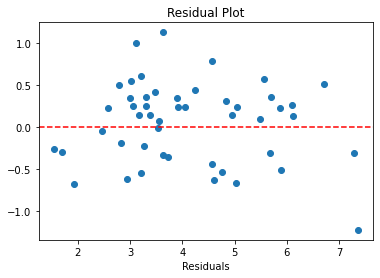

In [5]:
x = data[['Height', "Weight", "Length1", "Length2", "Length3"]]
y = data['Width'].values.reshape(-1, 1)

reg, x_test, y_train, y_test, Y_pred = model_training(x, y)
model_evalution(reg, x_test, y_test, Y_pred)

In [8]:
height = float(input('Enter height: '))
weight = float(input("Enter Weight: "))
length1 = float(input("Enter Length1: "))
length2 = float(input("Enter Length2: "))
length3 = float(input("Enter Length3: "))

print("Width = ",float(reg.predict([[height, weight, length1, length2, length3]])))

Enter height: 11.5
Enter Weight: 242
Enter Length1: 23
Enter Length2: 25
Enter Length3: 30
Width =  3.5711503061363237


C:\Users\RAMU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
